In [5]:
import pandas as pd
import re
import langdetect
from langdetect.lang_detect_exception import LangDetectException
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to C:\Users\Sai
[nltk_data]     Megana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Sai
[nltk_data]     Megana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Sai
[nltk_data]     Megana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#Load the data
def load_data(file_path):
    return pd.read_excel(file_path)
input_file = "G:/2-1/thesis.xlsx"
output_file = "G:/2-1/preprocessed_english_data.xlsx"



In [ ]:

# Function to detect the language
# Function to detect the language
def detect_language(text):
    if isinstance(text, str):
        try:
            return langdetect.detect(text)
        except LangDetectException:
            return 'unknown'
    else:
        return 'unknown'

# Filter out non-English tweets
def filter_english_tweets(data):
    english_tweets = data[data['Language'] == 'en']['Tweet']
    return english_tweets

# Punctuation removal
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Numeric removal
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Convert to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Tokenization, stemming, lemmatization, and stopword removal
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Remove linksimport pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from langdetect import detect

# Load the Excel file with English tweets
english_tweets_file_path = 'english_tweets.xlsx'
df_english_tweets = pd.read_excel(english_tweets_file_path)

# Punctuation removal
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Numeric removal
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Convert to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Tokenization, stemming, lemmatization, and stopword removal
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Remove links
def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Remove emojis and special characters
def remove_special_characters(text):
    return text.encode('ascii', 'ignore').decode('ascii')

# Remove usernames (mentions)
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

# Preprocessing pipeline
def preprocess_pipeline(text):
    text = remove_links(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = convert_to_lowercase(text)
    text = remove_usernames(text)
    text = preprocess_text(text)
    return text

# Apply the preprocessing pipeline to the 'Tweet' column
df_english_tweets['PreprocessedTweet'] = df_english_tweets['Tweet'].apply(preprocess_pipeline)

# Save the preprocessed data to a new Excel file
output_preprocessed_file_path = 'english_tweets_preprocessed.xlsx'
df_english_tweets.to_excel(output_preprocessed_file_path, index=False)

print('Preprocessing completed. Results saved in', output_preprocessed_file_path)

def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Remove emojis and special characters
def remove_special_characters(text):
    return text.encode('ascii', 'ignore').decode('ascii')

# Remove usernames (mentions)
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

# Preprocessing pipeline
def preprocess_pipeline(text):
    text = remove_links(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = convert_to_lowercase(text)
    text = remove_usernames(text)
    text = preprocess_text(text)
    return text

# Save preprocessed data
def save_preprocessed_data(data, output_file):
    data.to_excel(output_file, index=False)

# Main preprocessing function
def preprocess_data(input_file, output_file):
    data = load_data(input_file)
    data['Language'] = data['Tweet'].apply(detect_language)
    english_tweets = filter_english_tweets(data)
    data.loc[data['Language'] == 'en', 'Tweet'] = english_tweets.apply(preprocess_pipeline)
    save_preprocessed_data(data, output_file)

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Example usage


In [8]:
pip install pandas langdetect openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from langdetect import detect

# Load the Excel file
input_file_path = 'G:/2-1/thesis.xlsx'
df = pd.read_excel(input_file_path)

# Function to detect language and filter non-English tweets
def detect_language(text):
    try:
        language = detect(text)
        return text if language == 'en' else ''
    except:
        return ''

# Apply language detection to each tweet in the 'Tweet' column
df['English_Tweets'] = df['Tweet'].apply(detect_language)

# Save the updated DataFrame with the new 'English_Tweets' column to the same Excel file
output_file_path = 'G:/2-1/thesis.xlsx'
df.to_excel(output_file_path, index=False)

print('Language detection and filtering completed. Results saved in', output_file_path)


Language detection and filtering completed. Results saved in G:/2-1/thesis.xlsx


In [15]:
import pandas as pd
from langdetect import detect

# Load the Excel file
input_file_path = 'G:/2-1/Thesis_sample.xlsx'
df = pd.read_excel(input_file_path)

# Function to detect language and mark if it's English
def mark_english(text):
    try:
        language = detect(text)
        return True if language == 'en' else False
    except:
        return False

# Apply language detection to each tweet in the 'Tweet' column
df['IsEnglish'] = df['Tweet'].apply(mark_english)

# Save the updated DataFrame with the new 'IsEnglish' column to the same Excel file
output_file_path = 'G:/2-1/thesis2.xlsx'
df.to_excel(output_file_path, index=False)

print('Language detection and marking completed. Results saved in', output_file_path)


Language detection and marking completed. Results saved in G:/2-1/thesis2.xlsx


In [16]:
english_tweet_count = df['IsEnglish'].sum()

In [17]:
english_tweet_count

8611

In [18]:
import pandas as pd
from langdetect import detect

# Load the Excel file
input_file_path = 'G:/2-1/Thesis_sample.xlsx'
df = pd.read_excel(input_file_path)

# Function to detect language and mark if it's English
def mark_english(text):
    try:
        language = detect(text)
        return True if language == 'en' else False
    except:
        return False

# Apply language detection to each tweet in the 'Tweet' column
df['IsEnglish'] = df['Tweet'].apply(mark_english)

# Filter only the rows where 'IsEnglish' is True
df_english_tweets = df[df['IsEnglish']]

# Save the DataFrame with only the English tweets to a new Excel file
output_english_file_path = 'G:/2-1/english_tweets.xlsx'
df_english_tweets.to_excel(output_english_file_path, index=False)

print('Filtered English tweets saved in', output_english_file_path)


Filtered English tweets saved in G:/2-1/english_tweets.xlsx


In [1]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Load the Excel file with English tweets
english_tweets_file_path = 'G:/2-1/english_tweets.xlsx'
df_english_tweets = pd.read_excel(english_tweets_file_path)

# Function to detect the language
def detect_language(text):
    if isinstance(text, str):
        try:
            return langdetect.detect(text)
        except langdetect.LangDetectException:
            return 'unknown'
    else:
        return 'unknown'

# Punctuation removal
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

# Numeric removal
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Convert to lowercase
def convert_to_lowercase(text):
    return text.lower()

# Tokenization, stemming, lemmatization, and stopword removal
def preprocess_text(text, stemmer, lemmatizer):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(stemmer.stem(word)) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Remove links
def remove_links(text):
    return re.sub(r'http\S+', '', text)

# Remove emojis and special characters
def remove_special_characters(text):
    return text.encode('ascii', 'ignore').decode('ascii')

# Remove usernames (mentions)
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

# Preprocessing pipeline
def preprocess_pipeline(text):
    # Initialize stemmer and lemmatizer
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    text = remove_links(text)
    text = remove_special_characters(text)
    text = remove_punctuation(text)
    text = remove_numbers(text)
    text = convert_to_lowercase(text)
    text = remove_usernames(text)
    text = preprocess_text(text, stemmer, lemmatizer)
    return text

# Apply the preprocessing pipeline to the 'Tweet' column
df_english_tweets['PreprocessedTweet'] = df_english_tweets['Tweet'].apply(preprocess_pipeline)

# Save the preprocessed data to a new Excel file
output_preprocessed_file_path = 'G:/2-1/english_tweets.xlsx'
df_english_tweets.to_excel(output_preprocessed_file_path, index=False)

print('Preprocessing completed. Results saved in', output_preprocessed_file_path)


C:\Users\Public\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Preprocessing completed. Results saved in G:/2-1/english_tweets.xlsx


In [4]:
import nltk

# Uncomment the following line and run it once to download WordNet
nltk.download('wordnet')
nltk.download('omw-1.4')
# Now you can use the WordNet lemmatizer without encountering the LookupError


[nltk_data] Downloading package wordnet to C:\Users\Sai
[nltk_data]     Megana\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Sai
[nltk_data]     Megana\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Load the preprocessed data
preprocessed_data_file_path = 'G:/2-1/english_tweets.xlsx'
df_preprocessed = pd.read_excel(preprocessed_data_file_path)

# Assuming 'PreprocessedTweet' contains the preprocessed text
tweets = df_preprocessed['PreprocessedTweet']

# Ensure 'tweets' is a list of preprocessed tweet texts
tweets = tweets.astype(str).tolist()

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

# Fit and transform the tweets using TF-IDF
tfidf_features = tfidf_vectorizer.fit_transform(tweets)

# Convert TF-IDF features to a DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Add the TF-IDF features as new columns in the original DataFrame
df_with_tfidf = pd.concat([df_preprocessed, tfidf_df], axis=1)

# Save the DataFrame with TF-IDF features to the original file
output_tfidf_file_path = 'G:/2-1/english_tweets.xlsx'
df_with_tfidf.to_excel(output_tfidf_file_path, index=False)

print('TF-IDF feature extraction completed. Results saved in', output_tfidf_file_path)


TF-IDF feature extraction completed. Results saved in G:/2-1/english_tweets.xlsx


In [1]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1

     ------------------------------------ 636.8/636.8 kB 573.2 kB/s eta 0:00:00



[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from textblob import TextBlob
import pandas as pd
# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    
    # Classify the polarity of the tweet
    if analysis.sentiment.polarity > 0:
        return '1'
    elif analysis.sentiment.polarity == 0:
        return '2'
    else:
        return '0'
input_file = 'G:/2-1/english_tweets.xlsx'
preprocessed_data=pd.read_excel(input_file)

# Apply sentiment analysis to preprocessed tweets
preprocessed_data['Sentiment'] = preprocessed_data['PreprocessedTweet'].apply(analyze_sentiment)

# Save the data with sentiment analysis results
output_with_sentiment_file_path = 'G:/2-1/english_tweets_with_sentiment_analysis.xlsx'
preprocessed_data.to_excel(output_with_sentiment_file_path, index=False)

print('Sentiment analysis completed. Results saved in', output_with_sentiment_file_path)


Sentiment analysis completed. Results saved in G:/2-1/english_tweets_with_sentiment_analysis.xlsx


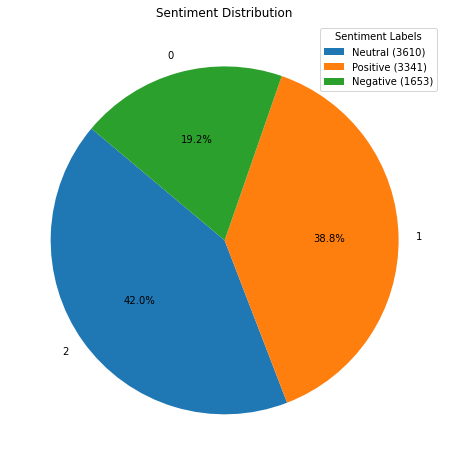

Sentiment analysis completed. Results saved in G:/2-1/english_tweets_with_sentiment_analysis.xlsx


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the preprocessed data
input_file = 'G:/2-1/english_tweets_with_sentiment_analysis.xlsx'
preprocessed_data = pd.read_excel(input_file)

# Count the number of tweets for each sentiment
sentiment_counts = preprocessed_data['Sentiment'].value_counts()

# Define labels for the legend with counts
labels = [f'Neutral ({sentiment_counts[2]})',
          f'Positive ({sentiment_counts[1]})',
          f'Negative ({sentiment_counts[0]})']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')

# Add legend
plt.legend(labels, title="Sentiment Labels", loc="upper right")

plt.show()

print('Sentiment analysis completed. Results saved in', input_file)


In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

# Load the India shape image and create a mask
india_mask = np.array(Image.open("G:/2-1/Indiamap.png"))
input_file = 'G:/2-1/english_tweets.xlsx'
df_english_tweets = pd.read_excel(input_file)



# Combine preprocessed tweets into a single string
combined_text = ' '.join(df_english_tweets['PreprocessedTweet'])


combined_text


'nigeria secur bn fresh invest pledg indian businessmen nigeria reportedli secur usbn promis invest indian privat sector compani presid officialabat visit india invest span key sector like agricultur powershow vist pm sheikh hasina expect ink mou india area cooper agricultur research sector cultur exchang simplif financi transact common peopl india bangladesh know india agricultur sector contribut gdp employ whop entir workforc rhythm rain crucial success agricultureindia rainfallmatt ei nino recent phenomenon rememb india basic agrarian countri set high standard growth primari sector time develop nation emulatebut unfortunatelyit agricultur winifr byanyima ed unaid emphas room connect convers room advanc sdg ungaxrf un_partnership success govern india first five year plan began adequatelyeffect invest agricultur infrastructur irrigationtransportationstorag facil sector would stronger today agricultur india emerg nd largest export agrochem global hub offpat solut dive agrochem newslett

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Load the preprocessed data
input_file = 'G:/2-1/english_tweets_with_sentiment_analysis.xlsx'
preprocessed_data = pd.read_excel(input_file)

# Assume 'PreprocessedTweet' is the column with preprocessed text

# Step 1: Preprocess the text data (if not already preprocessed)
# You may have your own preprocessing steps here
# preprocessed_data['PreprocessedTweet'] = preprocessed_data['OriginalTweet'].apply(preprocess_text)

# Step 2: TF-IDF Vectorization
# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Adjust max_features as needed

# Apply TF-IDF vectorization to the preprocessed text
X = tfidf_vectorizer.fit_transform(preprocessed_data['PreprocessedTweet'])

# Assuming 'Sentiment' is the target variable
y = preprocessed_data['Sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, X_train and X_test contain the TF-IDF features for training and testing data, respectively.
# y_train and y_test contain the corresponding sentiment labels.

# Further steps like model training and evaluation can be performed using the TF-IDF features (X_train and X_test).


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 3: Train the model
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
# Predict sentiment labels for the test set
y_pred = model.predict(X_test)

# Calculate accuracy and other evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('Classification Report:\n', classification_report)

# You can now use this trained model to make predictions on new text data.
# For predictions, you'll need to preprocess the new text similarly and transform it using the TF-IDF vectorizer before using the model.predict() method.


Accuracy: 0.8256827425915165
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.55      0.69       353
           1       0.87      0.85      0.86       676
           2       0.77      0.94      0.85       692

    accuracy                           0.83      1721
   macro avg       0.85      0.78      0.80      1721
weighted avg       0.84      0.83      0.82      1721



In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the preprocessed data
input_file = 'G:/2-1/english_tweets_with_sentiment_analysis.xlsx'
preprocessed_data = pd.read_excel(input_file)

# Assuming 'PreprocessedTweet' column contains the preprocessed text

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the preprocessed text and transform the text into a Bag of Words representation
bow_features = vectorizer.fit_transform(preprocessed_data['PreprocessedTweet'])

# Convert the Bag of Words features into a DataFrame
bow_df = pd.DataFrame(bow_features.toarray(), columns=vectorizer.get_feature_names_out())

# Combine the Bow DataFrame with the original DataFrame (if needed)
# For example, adding sentiment labels back to the Bow DataFrame
bow_df['Sentiment'] = preprocessed_data['Sentiment']

# Save the Bow DataFrame to a file

print('Bag of Words feature extraction completed.')


C:\Users\Public\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Bag of Words feature extraction completed.


In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Combine the Bow DataFrame with the original DataFrame
# Adding sentiment labels back to the Bow DataFrame
bow_df['Sentiment'] = preprocessed_data['Sentiment']

# Split the data into training and testing sets
X = bow_df.drop('Sentiment', axis=1)  # Features
y = bow_df['Sentiment']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Optionally, save the logistic regression model to a file
# model_save_path = 'path/to/save/model.pkl'
# joblib.dump(logistic_model, model_save_path)


Accuracy: 0.8797210923881464
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79       353
           1       0.92      0.89      0.90       676
           2       0.85      0.95      0.90       692

    accuracy                           0.88      1721
   macro avg       0.88      0.85      0.86      1721
weighted avg       0.88      0.88      0.88      1721



In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report  # Add this import

# Load and preprocess your data as shown in your previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model you want to tune (e.g., Logistic Regression)
model = LogisticRegression()

# Define a dictionary of hyperparameters and their potential values to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example values for the regularization parameter
    'penalty': ['l1', 'l2'],  # Example penalty types
    'max_iter': [200, 300, 400]  # Example values for the maximum number of iterations
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train a model with the best hyperparameters on the full training data
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Cross-validated Accuracy: {best_score}")
print(f"Test Set Accuracy: {accuracy}")
print('Classification Report:')
print(classification_report(y_test, y_pred))

C:\Users\Public\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Public\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

Best Hyperparameters: {'C': 100, 'max_iter': 200, 'penalty': 'l2'}
Cross-validated Accuracy: 0.8653218996470251
Test Set Accuracy: 0.8739105171411969
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       353
           1       0.90      0.89      0.89       676
           2       0.84      0.93      0.89       692

    accuracy                           0.87      1721
   macro avg       0.88      0.85      0.86      1721
weighted avg       0.88      0.87      0.87      1721



C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)

# Train the Random Forest model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report for more detailed metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9041255084253341
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       353
           1       0.91      0.91      0.91       676
           2       0.89      0.99      0.94       692

    accuracy                           0.90      1721
   macro avg       0.91      0.88      0.89      1721
weighted avg       0.91      0.90      0.90      1721



In [2]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed

# Train the GBM model on the training data
gbm.fit(X_train, y_train)

# Predict on the test data
y_pred = gbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8274259151656014
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.58      0.71       353
           1       0.93      0.79      0.85       676
           2       0.75      0.99      0.85       692

    accuracy                           0.83      1721
   macro avg       0.86      0.79      0.80      1721
weighted avg       0.85      0.83      0.82      1721



In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already split your data into X_train, X_test, y_train, and y_test as in the previous code.

# Create an instance of the Extra Trees Classifier
etc_model = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters

# Train the Extra Trees Classifier on the training data
etc_model.fit(X_train, y_train)

# Predict on the test data
y_pred = etc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9337594421847762
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       353
           1       0.92      0.95      0.94       676
           2       0.94      0.98      0.96       692

    accuracy                           0.93      1721
   macro avg       0.93      0.91      0.92      1721
weighted avg       0.93      0.93      0.93      1721



In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already prepared your TF-IDF features and split the data into X_train, X_test, y_train, and y_test as shown in your previous code

# Create an instance of the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.821034282393957
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.55      0.69       353
           1       0.87      0.83      0.85       676
           2       0.75      0.96      0.84       692

    accuracy                           0.82      1721
   macro avg       0.86      0.78      0.80      1721
weighted avg       0.84      0.82      0.81      1721



In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the preprocessed data
input_file = 'G:/2-1/english_tweets_with_sentiment_analysis.xlsx'
preprocessed_data = pd.read_excel(input_file)

# Assuming 'PreprocessedTweet' column contains the preprocessed text

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the preprocessed text and transform the text into a Bag of Words representation
bow_features = vectorizer.fit_transform(preprocessed_data['PreprocessedTweet'])

# Convert the Bag of Words features into a DataFrame
bow_df = pd.DataFrame(bow_features.toarray(), columns=vectorizer.get_feature_names_out())

# Combine the Bow DataFrame with the original DataFrame (if needed)
# For example, adding sentiment labels back to the Bow DataFrame
bow_df['Sentiment'] = preprocessed_data['Sentiment']

# Save the Bow DataFrame to a file

print('Bag of Words feature extraction completed.')


Bag of Words feature extraction completed.


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
  # Replace 'path_to_bow_features.xlsx' with the actual path

# Split the data into features (X) and target labels (y)
X = bow_df.drop('Sentiment', axis=1)  # Features
y = bow_df['Sentiment']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators as needed

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9233004067402673
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       353
           1       0.93      0.93      0.93       676
           2       0.91      0.99      0.95       692

    accuracy                           0.92      1721
   macro avg       0.93      0.90      0.91      1721
weighted avg       0.92      0.92      0.92      1721



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and labels (y)
X = bow_df.drop('Sentiment', axis=1)  # Features
y = bow_df['Sentiment']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier()

# Train the GBM classifier on the training data
gbm_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = gbm_classifier.predict(X_test)

# Evaluate the GBM classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8285880302149913
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.59      0.71       353
           1       0.94      0.79      0.86       676
           2       0.74      0.99      0.85       692

    accuracy                           0.83      1721
   macro avg       0.86      0.79      0.81      1721
weighted avg       0.85      0.83      0.82      1721



In [9]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already prepared your BoW features and split the data into X_train, X_test, y_train, and y_test as shown in your previous code

# Create an instance of the Extra Trees Classifier
et_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed

# Train the Extra Trees Classifier on the training data
et_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = et_classifier.predict(X_test)

# Evaluate the Extra Trees Classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9343404997094712
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.87       353
           1       0.92      0.95      0.94       676
           2       0.94      0.98      0.96       692

    accuracy                           0.93      1721
   macro avg       0.94      0.91      0.92      1721
weighted avg       0.94      0.93      0.93      1721



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the BoW data into features (X) and labels (y)
X = bow_df.drop('Sentiment', axis=1)  # Features
y = bow_df['Sentiment']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an instance of the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Predict sentiment labels on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Display a classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8128994770482277
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.52      0.66       353
           1       0.83      0.86      0.84       676
           2       0.77      0.92      0.84       692

    accuracy                           0.81      1721
   macro avg       0.84      0.76      0.78      1721
weighted avg       0.83      0.81      0.80      1721

